In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv('datasets/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='count', ylabel='Gender'>

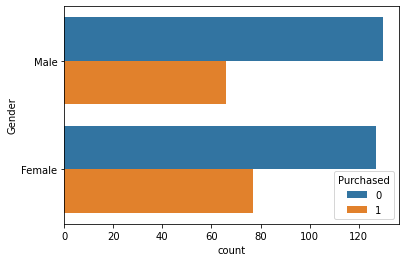

In [6]:
sns.countplot(y='Gender',data=df,hue='Purchased')

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

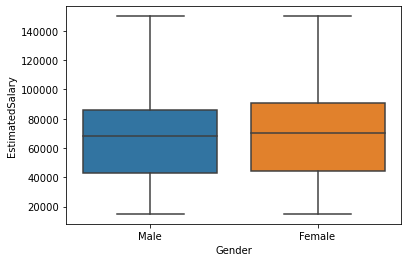

In [7]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

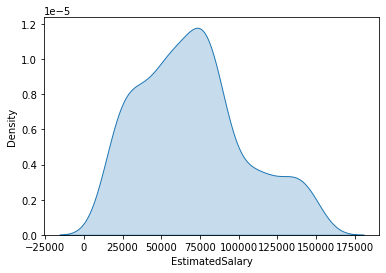

In [8]:
 sns.kdeplot(x='EstimatedSalary',data=df,shade=True)

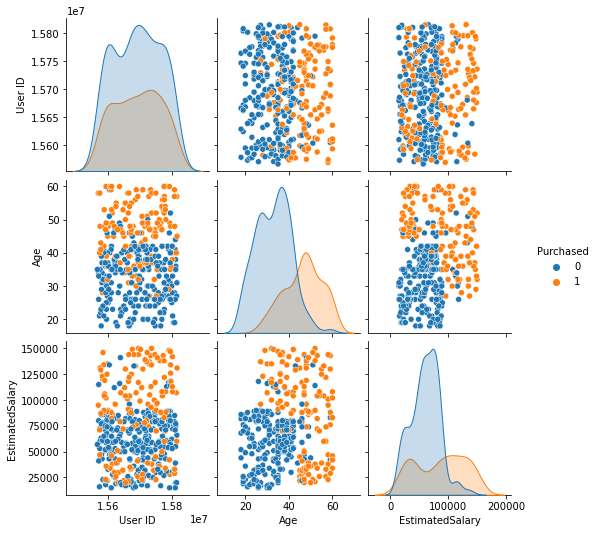

In [9]:
sns.pairplot(data=df,hue='Purchased')

In [10]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [11]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']


In [16]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [18]:
y_train.value_counts()

0    206
1    114
Name: Purchased, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train).over_sampling 

ModuleNotFoundError: No module named 'imblearn'

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [23]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [24]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')

using: LR
train accuarcy:0.85
test accuarcy:0.8375
recall: 0.7586206896551724
precision: 0.7857142857142857
f1score: 0.7719298245614034
fbeta: 0.7801418439716311
using: KNN
train accuarcy:0.925
test accuarcy:0.9
recall: 0.8620689655172413
precision: 0.8620689655172413
f1score: 0.8620689655172413
fbeta: 0.8620689655172413
using: DT
train accuarcy:1.0
test accuarcy:0.875
recall: 0.9310344827586207
precision: 0.7714285714285715
f1score: 0.8437500000000001
fbeta: 0.7988165680473372
using: SVC
train accuarcy:0.915625
test accuarcy:0.875
recall: 0.8620689655172413
precision: 0.8064516129032258
f1score: 0.8333333333333334
fbeta: 0.8169934640522875
using: RF
train accuarcy:1.0
test accuarcy:0.9125
recall: 0.9655172413793104
precision: 0.8235294117647058
f1score: 0.888888888888889
fbeta: 0.8484848484848483
using: XGBC
[00:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:1.0
test accuarcy:0.9
recall: 0.9310344827586207
precision: 0.8181818181818182
f1score: 0.8709677419354839
fbeta: 0.8385093167701864
using: NB
train accuarcy:0.890625
test accuarcy:0.9
recall: 0.896551724137931
precision: 0.8387096774193549
f1score: 0.8666666666666666
fbeta: 0.8496732026143791


In [25]:
df=pd.read_csv('datasets/Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


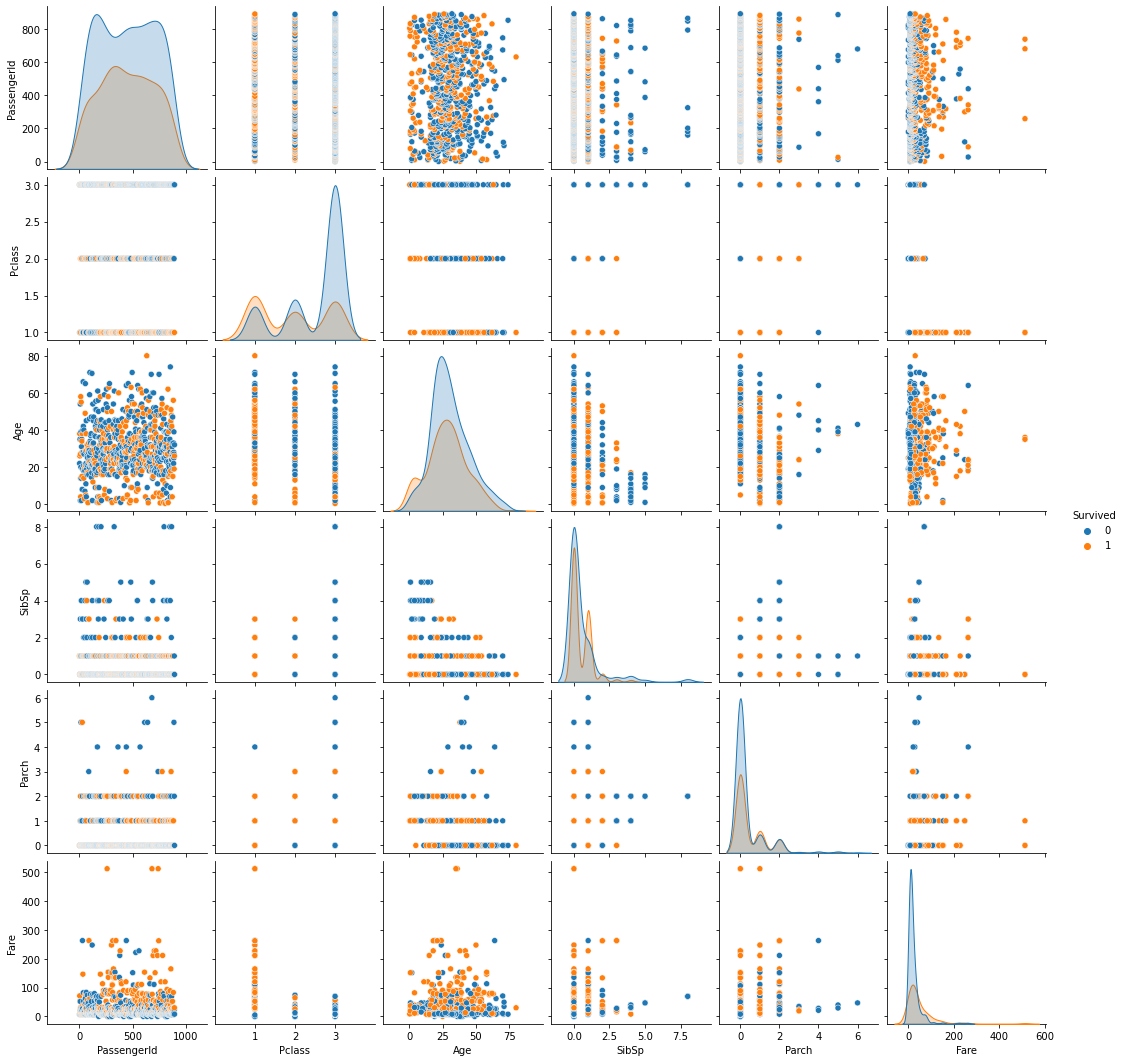

In [29]:
sns.pairplot(data=df,hue='Survived')

In [30]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['Age']=imputer.fit_transform(df[['Age']])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Cabin']=imputer.fit_transform(df[['Cabin']])
df.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [33]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked']=imputer.fit_transform(df[['Embarked']])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


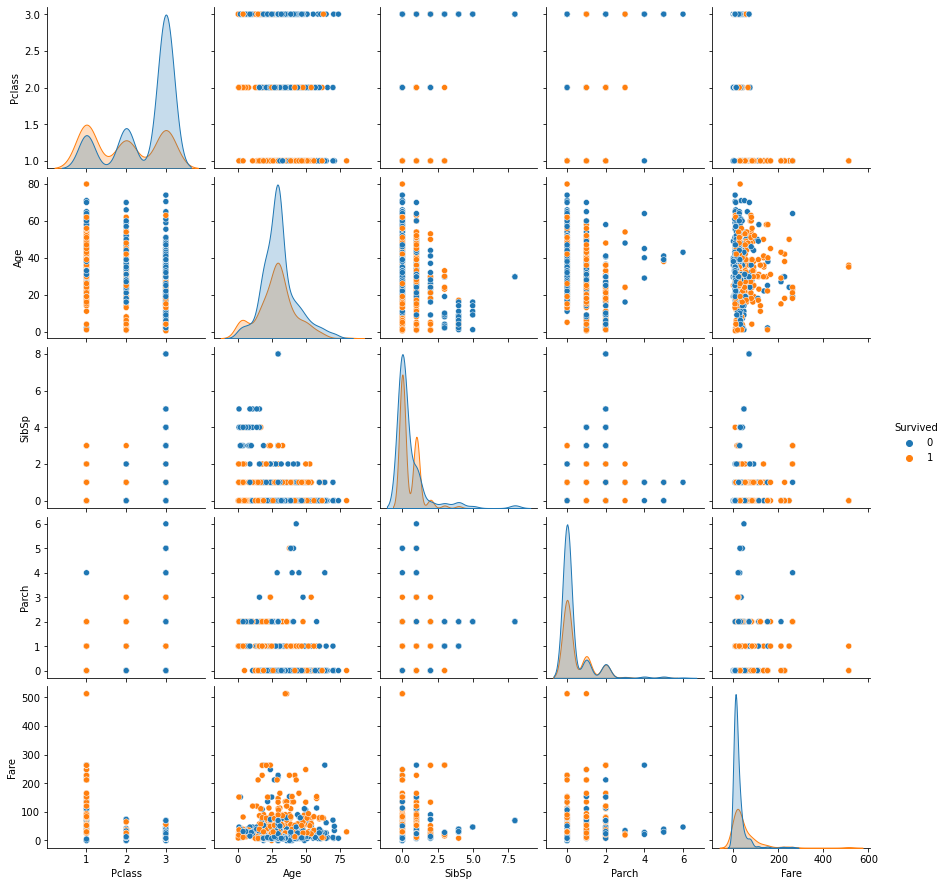

In [36]:
sns.pairplot(data=df,hue='Survived')

In [37]:
df=pd.get_dummies(df,columns=['Sex'],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.000000,1,0,7.2500,S,1
1,1,1,38.000000,1,0,71.2833,C,0
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


In [38]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


In [39]:
x=df.drop('Survived',axis=1)
y=df['Survived']


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [41]:
y_train.value_counts()/len(y_train)

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score

In [45]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=7),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RF':RandomForestClassifier(n_estimators=60),
    'XGBC':XGBClassifier(),
    'NB':GaussianNB()
}

In [46]:
for name,model in models.items():
    print(f'using: {name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'train accuarcy:{accuracy_score(y_train,model.predict(x_train))}')
    print(f'test accuarcy:{accuracy_score(y_test,y_pred)}')
    print(f'recall: {recall_score(y_test,y_pred)}')
    print(f'precision: {precision_score(y_test,y_pred)}')
    print(f'f1score: {f1_score(y_test,y_pred)}')
    print(f'fbeta: {fbeta_score(y_test,y_pred,beta=0.5)}')

using: LR
train accuarcy:0.7963483146067416
test accuarcy:0.8212290502793296
recall: 0.7391304347826086
precision: 0.7846153846153846
f1score: 0.7611940298507462
fbeta: 0.7750759878419452
using: KNN
train accuarcy:0.8412921348314607
test accuarcy:0.8268156424581006
recall: 0.7391304347826086
precision: 0.796875
f1score: 0.7669172932330827
fbeta: 0.7846153846153847
using: DT
train accuarcy:0.9831460674157303
test accuarcy:0.8044692737430168
recall: 0.6811594202898551
precision: 0.7833333333333333
f1score: 0.7286821705426356
fbeta: 0.7605177993527509
using: SVC
train accuarcy:0.8398876404494382
test accuarcy:0.8379888268156425
recall: 0.6231884057971014
precision: 0.9347826086956522
f1score: 0.7478260869565218
fbeta: 0.849802371541502
using: RF
train accuarcy:0.9831460674157303
test accuarcy:0.8268156424581006
recall: 0.7101449275362319
precision: 0.8166666666666667
f1score: 0.7596899224806202
fbeta: 0.7928802588996763
using: XGBC
[00:09:16] WARNING: C:/Users/Administrator/workspace/xgbo

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


train accuarcy:0.9676966292134831
test accuarcy:0.8100558659217877
recall: 0.6956521739130435
precision: 0.7868852459016393
f1score: 0.7384615384615385
fbeta: 0.7667731629392971
using: NB
train accuarcy:0.7808988764044944
test accuarcy:0.8268156424581006
recall: 0.7536231884057971
precision: 0.7878787878787878
f1score: 0.7703703703703704
fbeta: 0.7807807807807807
